In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

(36, 2)


Text(0.5, 0, 'CO2')

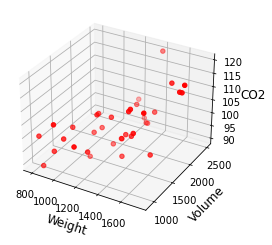

In [2]:
%matplotlib inline
df = pd.read_csv('cars.csv')
X = df[['Weight', 'Volume']]
X = X.to_numpy()
y = df['CO2']
y = y.to_numpy()
print(X.shape)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y, c='r', marker='o')
ax.set_xlabel('Weight',fontsize=12)
ax.set_ylabel('Volume',fontsize=12)
ax.set_zlabel('CO2',fontsize=12)

## Cost Function & Gradients
To polynomial regression with two features $x_1$ and $x_2$, so our model (based on a 2nd degree polynomial with two features) looks like this:

<b>Hypotesis</b>

$\begin{equation*}
\large
h(\boldsymbol{x};\boldsymbol{\theta})= \theta_0x_0 + \theta_1x_1+ \theta_2x_2 + \theta_3 x_1^2 + \theta_4 x_2^2 + + \theta_5 x_1x_2
\end{equation*}
$

<b>Vectorial notation</b>
<b>if </b>
\begin{equation}
\large
\boldsymbol{x}=  [x_0 + x_1+ x_2 + x_1^2 + x_2^2 + + x_1x_2]
\end{equation}
<b>then</b>
\begin{equation}
h(\boldsymbol{x};\boldsymbol{\theta})=\boldsymbol{\theta}^T\boldsymbol{x}
\end{equation}


<b>Cost</b>
\begin{equation}
\large
J(\theta) =  \frac{1}{2m} \sum_{i=1}^{m} (h(\theta)^{(i)} - y^{(i)})^2 
\end{equation}

<b>Cost function for second degree polynomial</b>
\begin{equation}
\large
J(\theta) =  \frac{1}{2m} \sum_{i=1}^{m} ((\theta_0 + \theta_1x_i+ \theta_2x_i^2) - y^{(i)})^2 
\end{equation}


<b>partial derivatives for Gradient</b>
\begin{equation}
\large
\frac{\partial J(\theta)}{\partial \theta_0} = 1/m \sum_{i=1}^{m}( (\theta_0 + \theta_1x_i+ \theta_2x_i^2) - y^{(i)}) x_0
\end{equation}

\begin{equation}
\large
\frac{\partial J(\theta)}{\partial \theta_1} = 1/m \sum_{i=1}^{m}( (\theta_0 + \theta_1x_i+ \theta_2x_i^2) - y^{(i)}) x_1
\end{equation}

\begin{equation}
\large
\frac{\partial J(\theta)}{\partial \theta_2} = 1/m \sum_{i=1}^{m}( (\theta_0 + \theta_1x_i+ \theta_2x_i^2) - y^{(i)}) x_2
\end{equation}

\begin{equation}
\large
\frac{\partial J(\theta)}{\partial \theta_3} = 1/m \sum_{i=1}^{m}( (\theta_0 + \theta_1x_i+ \theta_2x_i^2) - y^{(i)}) x_1^2
\end{equation}

\begin{equation}
\large
\frac{\partial J(\theta)}{\partial \theta_4} = 1/m \sum_{i=1}^{m}( (\theta_0 + \theta_1x_i+ \theta_2x_i^2) - y^{(i)}) x_2^2
\end{equation}


\begin{equation}
\large
\frac{\partial J(\theta)}{\partial \theta_5} = 1/m \sum_{i=1}^{m}( (\theta_0 + \theta_1x_i+ \theta_2x_i^2) - y^{(i)}) x_1x_2
\end{equation}




\begin{equation}
\large
\nabla J(\boldsymbol{\theta}) = 1/m\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)})\cdot\boldsymbol{x}
\end{equation}




## Polinomio de orden 2

[ 1.         -1.85339987 -1.26519186  3.43509108  2.34490643  1.60071044]


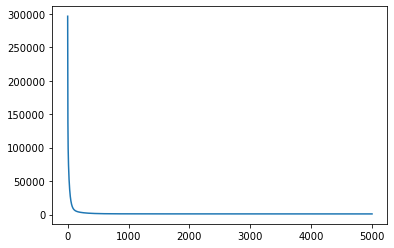

In [3]:
theta=np.array((random.randrange(-10, 10), 
                random.randrange(-10, 10), 
                random.randrange(-10,10), 
                random.randrange(-10,10), 
                random.randrange(-10,10), 
                random.randrange(-10,10)))
theta=np.reshape(theta,(len(theta),1))
lr = 1e-3
epochs=5000
m=len(X)
m=np.mean(X)
std=np.std(X)
X=(X-m)/std

X_b=np.c_[np.ones((len(X),1)),X[:,0],X[:,1],X[:,0]**2,X[:,0]*X[:,1],X[:,1]**2]
print(X_b[0,:])
y=np.reshape(y,(len(y),1))
j_cost= np.zeros([epochs])

for i in range(epochs):
    pred= np.dot(X_b,theta)
    arg=pred - y
    grad= X_b.T.dot(arg)
    theta = theta -lr*grad
    j_cost[i]=np.sum(np.square(arg))

fig = plt.figure()
plt.plot(j_cost)
plt.show()

In [4]:
%matplotlib qt

xc = np.arange(np.min(X_b[:,1]), np.max(X_b[:,1]), 0.01)
yc = np.arange(np.min(X_b[:,2]), np.max(X_b[:,2]), 0.01)
plane=np.zeros([len(xc),len(yc)])

for i in range(len(xc)):
    for j in range(len(yc)):
        plane[i,j]=np.dot(np.c_[1,xc[i],yc[j],xc[i]**2,xc[i]*yc[j],yc[j]**2],theta)
B, M = np.meshgrid(yc, xc)
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(B,M, plane,
                       linewidth=0, antialiased=False)
ax.scatter(X_b[:,2], X_b[:,1], y, c='r', marker='o')
ax.set_xlabel('Weight',fontsize=12)
ax.set_ylabel('Volume',fontsize=12)
ax.set_zlabel('CO2',fontsize=12)
plt.tight_layout()